# Z Score Method

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("placement (1).csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [8]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

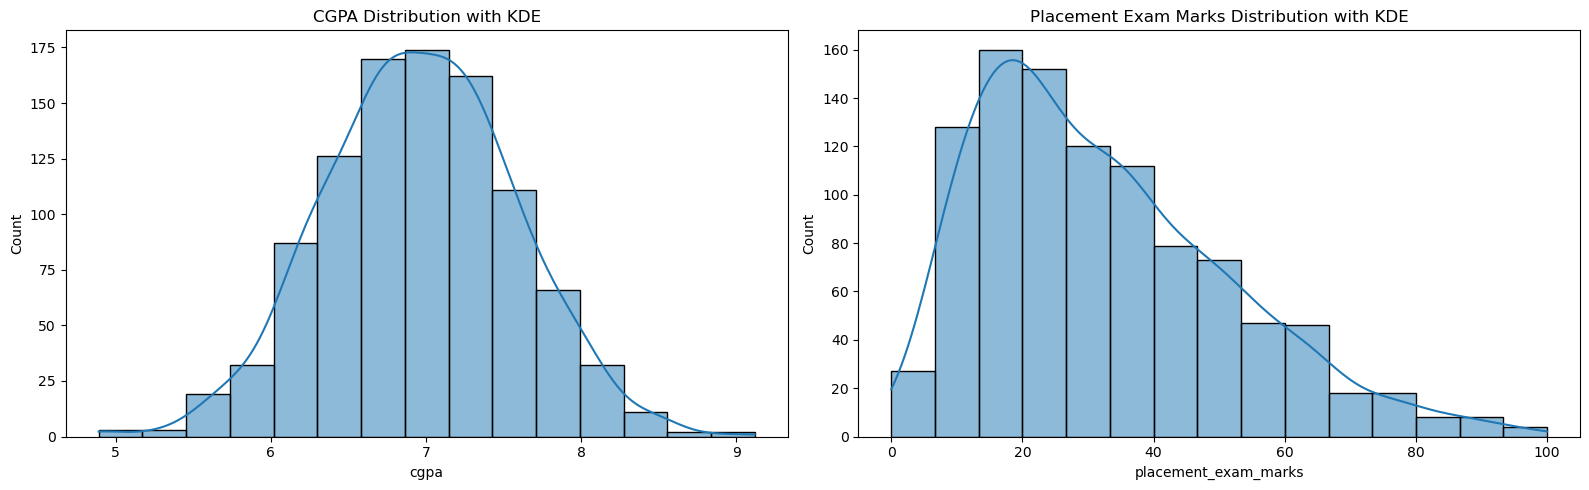

In [28]:
plt.figure(figsize=(16, 5))

# --- First Subplot (CGPA) ---
plt.subplot(1, 2, 1)
# Use sns.histplot and pass kde=True to show the distribution line
sns.histplot(df['cgpa'], kde=True, bins=15)
plt.title('CGPA Distribution with KDE')

# --- Second Subplot (Placement Exam Marks) ---
plt.subplot(1, 2, 2)
# Use sns.histplot and pass kde=True to show the distribution line
sns.histplot(df['placement_exam_marks'], kde=True, bins=15)
plt.title('Placement Exam Marks Distribution with KDE')

# Improves layout by preventing labels from overlapping
plt.tight_layout()

plt.show()

In [32]:
# STD,MEAN,Min,Max value of cgpa
print(f"Mean Value for CGPA: {df['cgpa'].mean()}")
print(f"Std Value for CGPA: {df['cgpa'].std()}")
print(f"Max Value for CGPA: {df['cgpa'].max()}")
print(f"Min Value for CGPA: {df['cgpa'].min()}")

Mean Value for CGPA: 6.96124
Std Value for CGPA: 0.6158978751323894
Max Value for CGPA: 9.12
Min Value for CGPA: 4.89


In [34]:
# Highest and Lowest Value Allowed
print(f"Highest Allowed Value for Cgpa: {df['cgpa'].mean() + 3*df['cgpa'].std()}")
print(f"Lowest Allowed Value for Cgpa: {df['cgpa'].mean() - 3*df['cgpa'].std()}")

Highest Allowed Value for Cgpa: 8.808933625397168
Lowest Allowed Value for Cgpa: 5.113546374602832


In [47]:
# Finding the Outliers
df[(df['cgpa']>8.80)| (df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming

In [51]:
# Without z-score
new_df = df[(df['cgpa']<8.80)&(df['cgpa']>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [56]:
df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()

In [58]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [60]:
df[df['cgpa_zscore']>3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [62]:
df[df['cgpa_zscore']<3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [70]:
# With Z-Score
new_df = df[(df['cgpa_zscore']<3)&(df['cgpa_zscore']>-3)]
new_df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [73]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [79]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [85]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64